In [2]:
import jax
import numpy as np

def filter_trace(
    trace: jax.typing.ArrayLike,
    trace_sampling: float,
    f_min: float,
    f_max: float,
    sample_axis: int = 0,
) -> jax.Array:
    """
    Filter the trace within the frequency domain of interest.

    Parameter:
    ----------
    trace : jax.typing.ArrayLike
        The trace to filter. Shape is SAMPLES x ...
    trace_sampling : float
        The sampling rate of the traces
    f_min : float
        The minimum frequency in which to filter, in MHz
    f_max : float
        The maximum frequency in which to filter, in MHz
    sample_axis : int, default=0
        The axis in which the filtering takes place. Default is 0, i.e. the first axis

    Return:
    ------
    filtered_trace : jax.Array
        The filtered trace within the requested frequency domain
    """
    # Assuming `trace_sampling` has the correct internal unit, freq is already in the internal unit system
    freq = np.fft.rfftfreq(trace.shape[sample_axis], d=trace_sampling)
    freq_range = np.logical_and(freq > f_min, freq < f_max)

    # Find the median maximum sample number of the traces
    max_indces = np.median(np.argmax(trace, axis=sample_axis))
    to_roll = np.int32(trace.shape[sample_axis] // 2 - max_indces)

    # Roll all traces such that max is in the middle
    roll_pulse = np.roll(trace, to_roll, axis=sample_axis)

    # FFT, filter, IFFT
    spectrum = np.fft.rfft(roll_pulse, axis=sample_axis)
    spectrum = np.apply_along_axis(
        lambda ax: ax * np.int32(freq_range), sample_axis, spectrum
    )
    filtered = np.fft.irfft(spectrum, axis=sample_axis)

    return np.roll(filtered, -to_roll, axis=sample_axis)  # back to original position

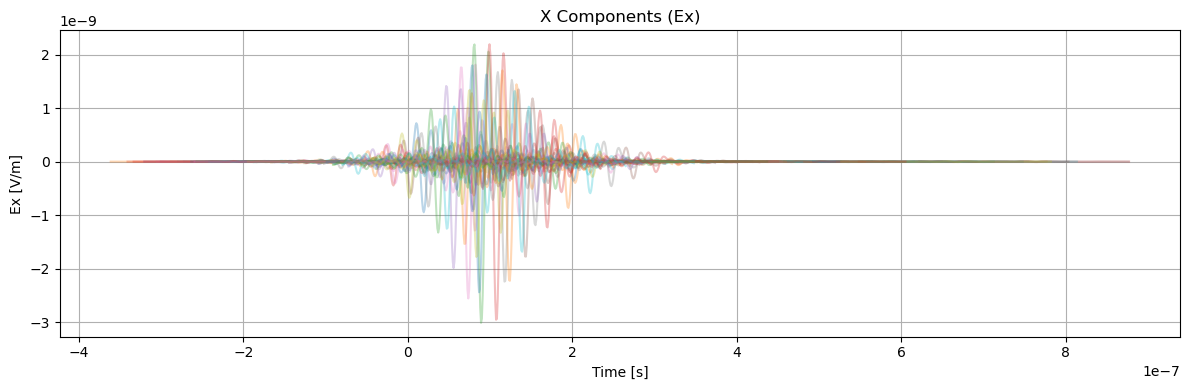

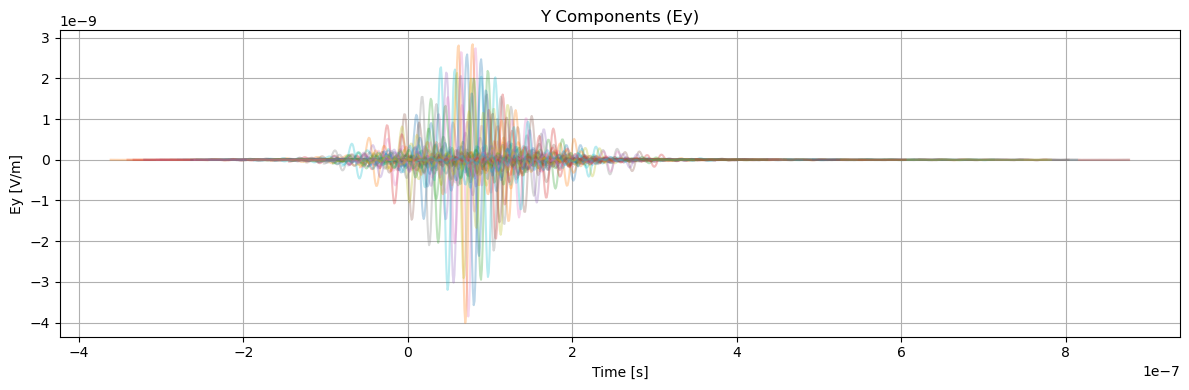

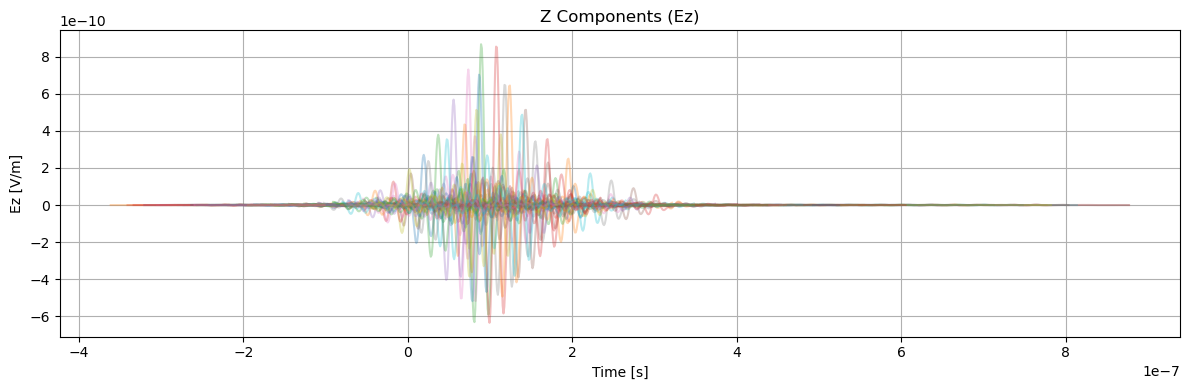

In [3]:
import h5py
import matplotlib.pyplot as plt

file_name = "/home/denis/radio_nn/HDF5_vs_PREDICTED/predicted/188216458/0/proton/SIM000018.hdf5"

with h5py.File(file_name, "r") as f_h5:
    observers = f_h5['CoREAS']['observers']
    dt = f_h5['CoREAS'].attrs['TimeResolution']

    # Plot X components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time = observers[pos][:, 0]
        X = observers[pos][:, 1]
        plt.plot(time, X, alpha=0.3)
    plt.title("X Components (Ex)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ex [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Y components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time = observers[pos][:, 0]
        Y = observers[pos][:, 2]
        plt.plot(time, Y, alpha=0.3)
    plt.title("Y Components (Ey)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ey [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Z components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time = observers[pos][:, 0]
        Z = observers[pos][:, 3]
        plt.plot(time, Z, alpha=0.3)
    plt.title("Z Components (Ez)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ez [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


9.999999999999957e-10
<HDF5 dataset "pos_350_225": shape (4082, 4), type "<f8">
(4082,)
(4082,)
(4082,)
(4082,)
76293.9453125
30000000.0
80000000.0


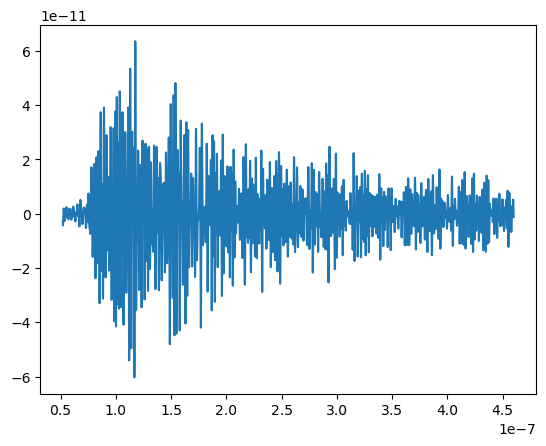

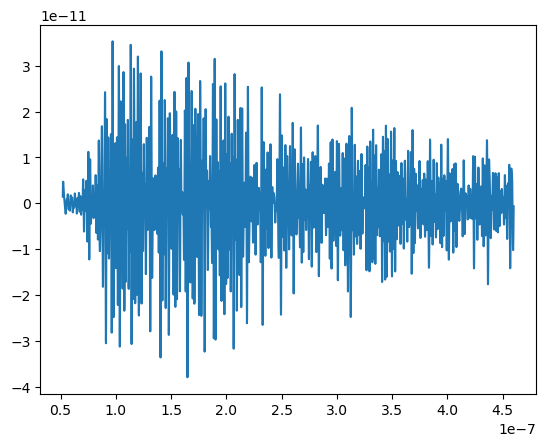

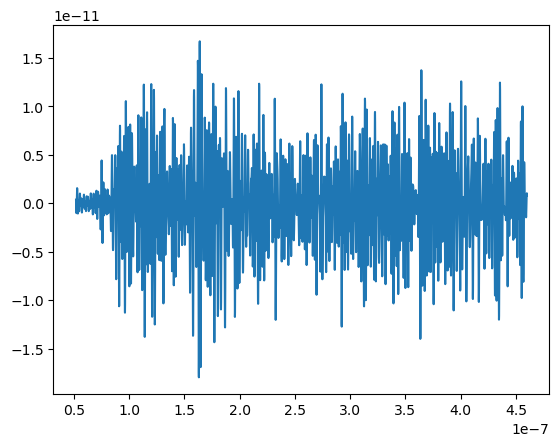

In [4]:
import h5py
import matplotlib.pyplot as plt

SIM_NUMBER = '000000'
file_name = f"/home/denis/radio_nn/HDF5_vs_PREDICTED/original/188216458/0/proton/SIM000018.hdf5"

#fängt mit proton 57 an
print(dt)

f_h5 = h5py.File(file_name, "r")

f_h5_inputs = f_h5["inputs"]
f_h5_hl = f_h5["highlevel"]
f_h5_obsplane = f_h5_hl["obsplane_na_na_vB_vvB"]

position = 'pos_350_225'

print(f_h5['CoREAS']['observers'][position])

time = f_h5['CoREAS']['observers'][position][:,0]
X = f_h5['CoREAS']['observers'][position][:,1]
Y = f_h5['CoREAS']['observers'][position][:,2]
Z = f_h5['CoREAS']['observers'][position][:,3]

print(time.shape)
print(X.shape)
print(Y.shape)
print(Z.shape)

#time = filter_trace(time,dt,f_h5_obsplane.attrs["frequency_low"],f_h5_obsplane.attrs["frequency_high"])
X = filter_trace(X,dt,f_h5_obsplane.attrs["frequency_low"],f_h5_obsplane.attrs["frequency_high"])
Y = filter_trace(Y,dt,f_h5_obsplane.attrs["frequency_low"],f_h5_obsplane.attrs["frequency_high"])
Z = filter_trace(Z,dt,f_h5_obsplane.attrs["frequency_low"],f_h5_obsplane.attrs["frequency_high"])



print(f_h5_obsplane.attrs["frequency_resolution"])
print(f_h5_obsplane.attrs["frequency_low"])
print(f_h5_obsplane.attrs["frequency_high"])

#print(np.array(f_h5["atmosphere"]["Ref Index"]))

plt.plot(time,X)
plt.show()
plt.plot(time,Y)
plt.show()
plt.plot(time,Z)
plt.show()

f_h5.close()

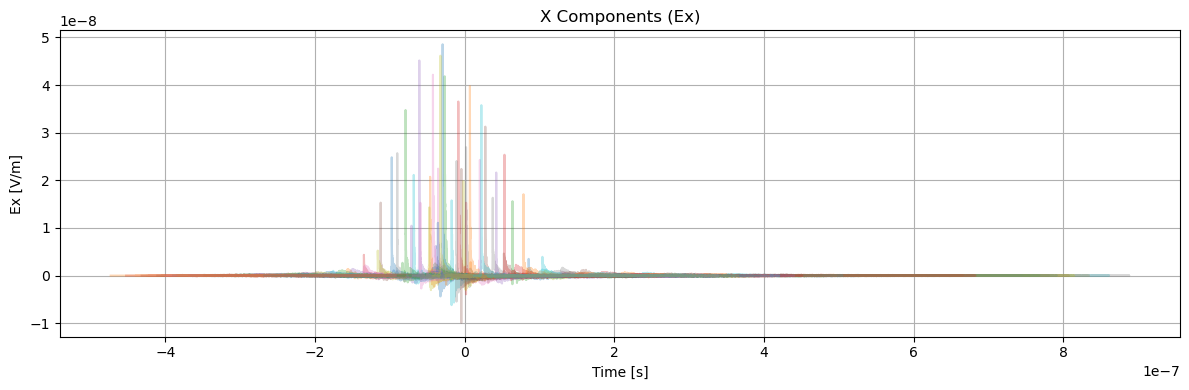

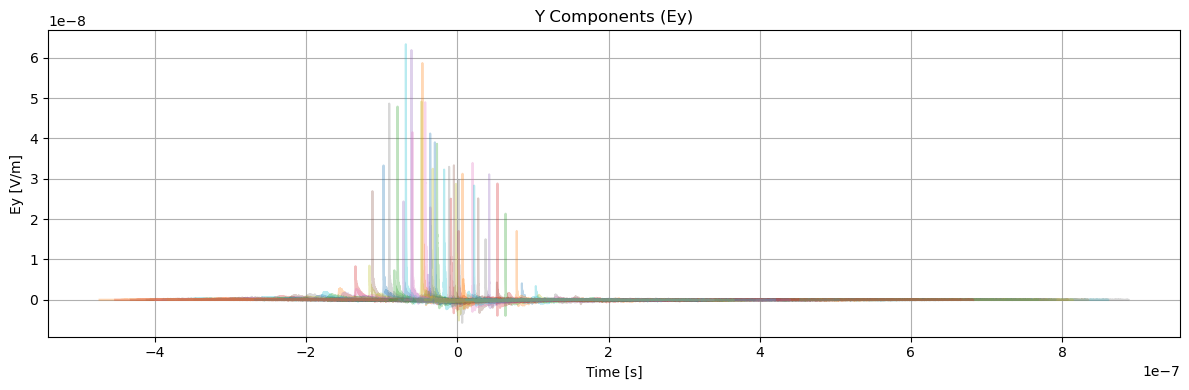

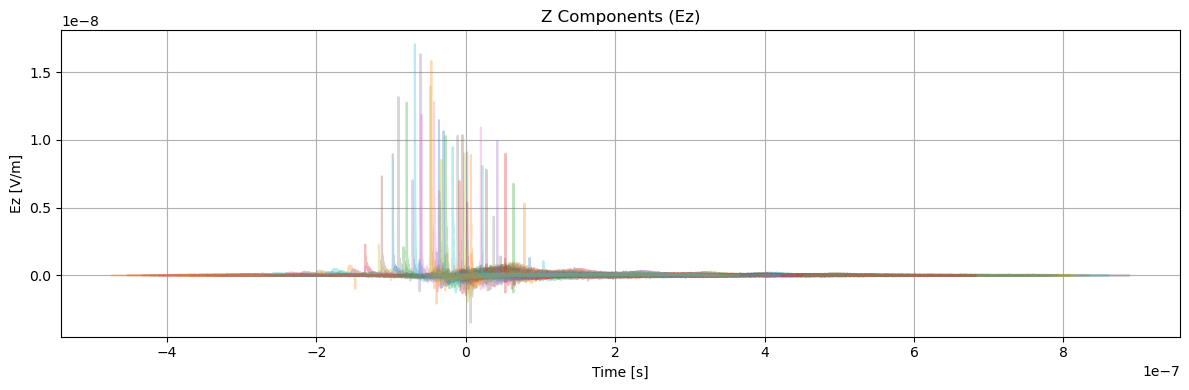

In [5]:
import h5py
import matplotlib.pyplot as plt

file_name = f"/home/denis/radio_nn/HDF5_vs_PREDICTED/original/188216458/0/proton/SIM000018.hdf5"

with h5py.File(file_name, "r") as f_h5:
    observers = f_h5['CoREAS']['observers']

    # Plot X components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time = observers[pos][:, 0]
        X = observers[pos][:, 1]
        plt.plot(time, X, alpha=0.3)
    plt.title("X Components (Ex)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ex [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Y components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time = observers[pos][:, 0]
        Y = observers[pos][:, 2]
        plt.plot(time, Y, alpha=0.3)
    plt.title("Y Components (Ey)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ey [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Z components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time = observers[pos][:, 0]
        Z = observers[pos][:, 3]
        plt.plot(time, Z, alpha=0.3)
    plt.title("Z Components (Ez)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ez [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [13]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import shutil
import h5py
from radiotools import helper as rdhelp
from radiotools import coordinatesystems
import units

def get_angles(corsika, declination):
    """
    Converting angles in corsika coordinates to local coordinates.

    Corsika positive x-axis points to the magnetic north, NRR coordinates positive x-axis points to the geographic east.
    Corsika positive y-axis points to the west, NRR coordinates positive y-axis points to the geographic north.
    Corsika z-axis points upwards, NuRadio z-axis points upwards.

    Corsika's zenith angle of a particle trajectory is defined between the particle momentum vector and the negative
    z-axis, meaning that the particle is described in the direction where it is going to. The azimuthal angle is
    described between the positive x-axis and the horizontal component of the particle momentum vector
    (i.e. with respect to the magnetic north) proceeding counterclockwise.

    NRR describes the particle zenith and azimuthal angle in the direction where the particle is coming from.
    Therefore, the zenith angle is the same, but the azimuthal angle has to be shifted by 180 + 90 degrees.
    The north has to be shifted by 90 degrees plus difference between geomagnetic and magnetic north.

    Parameters
    ----------
    corsika : hdf5 file object
        the open hdf5 file object of the corsika hdf5 file
    declination : float
        declination of the magnetic field, in internal units

    Returns
    -------
    zenith : float
        zenith angle
    azimuth : float
        azimuth angle
    magnetic_field_vector : np.ndarray
        magnetic field vector

    Examples
    --------
    The declinations can be obtained using the functions in the radiotools helper package, if you
    have the magnetic field for the site you are interested in.

    >>> magnet = hp.get_magnetic_field_vector('mooresbay')
    >>> dec = hp.get_declination(magnet)
    >>> evt = h5py.File('NuRadioReco/examples/example_data/example_data.hdf5', 'r')
    >>> get_angles(corsika, dec)[2] / units.gauss
    array([ 0.05646405, -0.08733734,  0.614     ])
    >>> magnet
    array([ 0.058457, -0.09042 ,  0.61439 ])
    """
    zenith = corsika['inputs'].attrs["THETAP"][0] * units.deg
    azimuth = rdhelp.get_normalized_angle(
        3 * np.pi / 2. + np.deg2rad(corsika['inputs'].attrs["PHIP"][0]) + declination / units.rad
    ) * units.rad

    # in CORSIKA convention, the first component points North (y in NRR) and the second component points down (minus z)
    By, minBz = corsika['inputs'].attrs["MAGNET"]
    B_inclination = np.arctan2(minBz, By)  # angle from y-axis towards negative z-axis

    B_strength = np.sqrt(By ** 2 + minBz ** 2) * units.micro * units.tesla

    # zenith of the magnetic field vector is 90 deg + inclination, as inclination proceeds downwards from horizontal
    # azimuth of the magnetic field vector is 90 deg - declination, as declination proceeds clockwise from North
    magnetic_field_vector = B_strength * rdhelp.spherical_to_cartesian(
        np.pi / 2 + B_inclination, np.pi / 2 - declination / units.rad
    )

    return zenith, azimuth, magnetic_field_vector

def get_geomagnetic_angle(zenith, azimuth, magnetic_field_vector):
    """
    Calculates the angle between the geomagnetic field and the shower axis defined by `zenith` and `azimuth`.

    Parameters
    ----------
    zenith : float
        zenith angle (in internal units)
    azimuth : float
        azimuth angle (in internal units)
    magnetic_field_vector : np.ndarray
        The magnetic field vector in the NRR coordinate system (x points East, y points North, z points up)

    Returns
    -------
    geomagnetic_angle : float
        geomagnetic angle
    """
    shower_axis_vector = rdhelp.spherical_to_cartesian(zenith / units.rad, azimuth / units.rad)
    geomagnetic_angle = rdhelp.get_angle(magnetic_field_vector, shower_axis_vector) * units.rad

    return geomagnetic_angle




file_name = "/home/denis/radio_nn/HDF5_vs_PREDICTED/predicted/188216458/0/proton/SIM000018.hdf5"

with h5py.File(file_name, "r") as f_h5:
    
    conversion_fieldstrength_cgs_to_SI = 2.99792458e4

    f_h5_inputs = f_h5["inputs"]
    f_h5_hl = f_h5["highlevel"]
    f_h5_obsplane = f_h5_hl["obsplane_na_na_vB_vvB"]
    Bx, Bz = f_h5_inputs.attrs["MAGNET"]
    B_inclination = np.arctan2(Bz, Bx)
    B_declination = 0
    B_strength = (Bx**2 + Bz**2) ** 0.5
    zenith, azimuth, magnetic_field_vector = get_angles(f_h5, 0)
    ctrans = coordinatesystems.cstrafo(
        zenith, azimuth, magnetic_field_vector=magnetic_field_vector
    )
    geomagnetic_angle = get_geomagnetic_angle(zenith, azimuth, magnetic_field_vector)
    
    observers = f_h5['CoREAS']['observers']
    
    # = 'pos_100_0'
    #for i in f_h5[f"/highlevel/traces/vB_vvB"]:
    
    observers_vB_vvB = f_h5[f"/highlevel/traces/vB_vvB"]
    
    data_2 = []
    for pos in observers:
        data = observers[pos]
        data_3 = data
        data_3[:, 1], data_3[:, 2] = -data_3[:, 2], data_3[:, 1]
#
        # convert to SI units
        data[:, 1] *= conversion_fieldstrength_cgs_to_SI
        data[:, 2] *= conversion_fieldstrength_cgs_to_SI
        data[:, 3] *= conversion_fieldstrength_cgs_to_SI
        
        data[:, 1:4] = ctrans.transform_to_vxB_vxvxB(data[:, 1:4])

    #time_vB_vvB = np.array(f_h5[f"/highlevel/traces/vB_vvB"][f'{i}'][:,0])
    #X_vB_vvB = np.array(f_h5[f"/highlevel/traces/vB_vvB"][f'{i}'][:,1])
    #Y_vB_vvB = np.array(f_h5[f"/highlevel/traces/vB_vvB"][f'{i}'][:,2])
    #Z_vB_vvB = np.array(f_h5[f"/highlevel/traces/vB_vvB"][f'{i}'][:,3])


    # Plot X components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time = observers[pos][:, 0]
        X_trafo_1 = -observers[pos][:, 2] * conversion_fieldstrength_cgs_to_SI
        X_trafo_2 = ctrans.transform_to_vxB_vxvxB(X_trafo_1)
        plt.plot(time, X, alpha=0.3)
    plt.title("X Components (Ex)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ex [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot X vB_vvB components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time_vB_vvB = observers_vB_vvB[pos][:, 0]
        X_vB_vvB = observers_vB_vvB[pos][:, 1] 
        plt.plot(time_vB_vvB, X_vB_vvB, alpha=0.3)
    plt.title("X vB vvB Components (Ex)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ex [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

    # Plot Y components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time = observers[pos][:, 0]
        Y_trafo_1 = observers[pos][:, 1] * conversion_fieldstrength_cgs_to_SI
        Y_trafo_2 = ctrans.transform_to_vxB_vxvxB(Y_trafo_1)
        plt.plot(time, Y, alpha=0.3)
    plt.title("Y Components (Ey)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ey [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot Y vB_vvB components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time_vB_vvB = observers_vB_vvB[pos][:, 0]
        Y_vB_vvB = observers_vB_vvB[pos][:, 2] 
        plt.plot(time_vB_vvB, Y_vB_vvB, alpha=0.3)
    plt.title("Y vB vvB Components (Ey)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ey [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Z components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time = observers[pos][:, 0]
        Z_trafo_1 = observers[pos][:, 3] * conversion_fieldstrength_cgs_to_SI
        Z_trafo_2 = ctrans.transform_to_vxB_vxvxB(Z_trafo_1)
        plt.plot(time, Z, alpha=0.3)
    plt.title("Z Components (Ez)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ez [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot Z vB_vvB components
    plt.figure(figsize=(12, 4))
    for pos in observers:
        time_vB_vvB = observers_vB_vvB[pos][:, 0]
        Z_vB_vvB = observers_vB_vvB[pos][:, 3]
        plt.plot(time_vB_vvB, Z_vB_vvB, alpha=0.3)
    plt.title("Z vB vvB Components (Ey)")
    plt.xlabel("Time [s]")
    plt.ylabel("Ey [V/m]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


OSError: Can't synchronously write data (no write intent on file)

In [7]:
#observers positions of antennas and t,x,y,z

#inputs only has attributes
print('--------------------------------')
print('input:')
print('--------------------------------')
print(f_h5["inputs"].attrs.keys())

for i in f_h5["inputs"].attrs.keys():
    print(f_h5["inputs"].attrs[i])

print('--------------------------------')
print('atmosphere:')
print('--------------------------------')
#atmosphere/numberOfParticles there is Depth,gammas,positrons,electrons,mu+,mu-,hadrons,charged,nuclei,cherenkov

#energy deposit there is depth,gamma,EM IONIZ (ionization energy), EM CUT, MU IONIZ, MU CUT, HADR IONIZ, HADR CUT, NEUTRINO, sum
print(f_h5['atmosphere'].keys())
print(f_h5['atmosphere'].attrs.keys())
print(f_h5['atmosphere']['EnergyDeposit'])
print(f_h5['atmosphere']['NumberOfParticles'])

#print(f_h5['atmosphere']['EnergyDeposit'][0:,0])
#print(f_h5['atmosphere']['EnergyDeposit'][0:,1])
#print(f_h5['atmosphere']['EnergyDeposit'][0:,2])
#print(f_h5['atmosphere']['EnergyDeposit'][0:,3])
print('--------------------------------')
print((f_h5['atmosphere']['EnergyDeposit'].attrs.keys()))
print(len(f_h5['atmosphere']['EnergyDeposit'][0::]))
print(f_h5['atmosphere']['NumberOfParticles'].attrs.keys())
print(f_h5['atmosphere'].attrs.keys())
print(f_h5['atmosphere'].attrs['Gaisser-Hillas-Fit'])
#print(f_h5["atmosphere"]["EnergyDeposit"][:, :])








--------------------------------
input:
--------------------------------


KeyError: 'Unable to synchronously open object (invalid identifier type to function)'

In [ ]:
print('--------------------------------')
print('CoREAS:')
print('--------------------------------')
print(f_h5["CoREAS"].attrs.keys())

#for i in f_h5["CoREAS"].attrs.keys():
#    print(f_h5["CoREAS"].attrs[i])
print(f_h5["CoREAS"].attrs['ShowerAzimuthAngle'])  
print(f_h5["CoREAS"].attrs['ShowerZenithAngle'])    
print(f_h5["CoREAS"]['observers'])
f_h5["CoREAS"].attrs['MagneticFieldInclinationAngle']
#observers positions of antennas and t,x,y,z
print(f_h5["CoREAS"]['observers']['pos_100_0'].attrs.keys())
print('--------------------------------')
print(f_h5["CoREAS"]['observers']['pos_100_0'].attrs.keys())

--------------------------------
CoREAS:
--------------------------------
<KeysViewHDF5 ['AutomaticTimeBoundaries', 'Comment', 'CoreCoordinateNorth', 'CoreCoordinateVertical', 'CoreCoordinateWest', 'CoreEastingOffline', 'CoreNorthingOffline', 'CoreVerticalOffline', 'CorsikaFilePath', 'CorsikaParameterFile', 'DepthOfShowerMaximum', 'DistanceOfShowerMaximum', 'EventNumber', 'GPSNanoSecs', 'GPSSecs', 'GeomagneticAngle', 'GroundLevelRefractiveIndex', 'MagneticFieldInclinationAngle', 'MagneticFieldStrength', 'OfflineCoordinateSystem', 'PrimaryParticleEnergy', 'PrimaryParticleType', 'ResolutionReductionScale', 'RotationAngleForMagfieldDeclination', 'RunNumber', 'ShowerAzimuthAngle', 'ShowerZenithAngle', 'TimeLowerBoundary', 'TimeResolution', 'TimeUpperBoundary']>
91.31677418
22.44339373
<HDF5 group "/CoREAS/observers" (160 members)>
<KeysViewHDF5 ['name', 'position']>
--------------------------------
<KeysViewHDF5 ['name', 'position']>


In [ ]:
import numpy as np

# Create a 2D array
array = np.array([[1, 2, 3, 4, 5],
                  [6, 7, 8, 9, 10],
                  [11, 12, 13, 14, 15]])

# Apply slicing
result = array[:,3]

print(result)

[ 4  9 14]


In [ ]:
print(list(f_h5['CoREAS']["observers"].keys()))

['pos_100_0', 'pos_100_135', 'pos_100_180', 'pos_100_225', 'pos_100_270', 'pos_100_315', 'pos_100_45', 'pos_100_90', 'pos_125_0', 'pos_125_135', 'pos_125_180', 'pos_125_225', 'pos_125_270', 'pos_125_315', 'pos_125_45', 'pos_125_90', 'pos_150_0', 'pos_150_135', 'pos_150_180', 'pos_150_225', 'pos_150_270', 'pos_150_315', 'pos_150_45', 'pos_150_90', 'pos_175_0', 'pos_175_135', 'pos_175_180', 'pos_175_225', 'pos_175_270', 'pos_175_315', 'pos_175_45', 'pos_175_90', 'pos_200_0', 'pos_200_135', 'pos_200_180', 'pos_200_225', 'pos_200_270', 'pos_200_315', 'pos_200_45', 'pos_200_90', 'pos_225_0', 'pos_225_135', 'pos_225_180', 'pos_225_225', 'pos_225_270', 'pos_225_315', 'pos_225_45', 'pos_225_90', 'pos_250_0', 'pos_250_135', 'pos_250_180', 'pos_250_225', 'pos_250_270', 'pos_250_315', 'pos_250_45', 'pos_250_90', 'pos_25_0', 'pos_25_135', 'pos_25_180', 'pos_25_225', 'pos_25_270', 'pos_25_315', 'pos_25_45', 'pos_25_90', 'pos_275_0', 'pos_275_135', 'pos_275_180', 'pos_275_225', 'pos_275_270', 'pos_2

In [ ]:
sim_num = 33
print(f"SIMOUTPUT{sim_num:06d}/")

SIMOUTPUT000033/


Testing memmaps:

vB vvB XYZ: <KeysViewHDF5 ['pos_100_0', 'pos_100_135', 'pos_100_180', 'pos_100_225', 'pos_100_270', 'pos_100_315', 'pos_100_45', 'pos_100_90', 'pos_125_0', 'pos_125_135', 'pos_125_180', 'pos_125_225', 'pos_125_270', 'pos_125_315', 'pos_125_45', 'pos_125_90', 'pos_150_0', 'pos_150_135', 'pos_150_180', 'pos_150_225', 'pos_150_270', 'pos_150_315', 'pos_150_45', 'pos_150_90', 'pos_175_0', 'pos_175_135', 'pos_175_180', 'pos_175_225', 'pos_175_270', 'pos_175_315', 'pos_175_45', 'pos_175_90', 'pos_200_0', 'pos_200_135', 'pos_200_180', 'pos_200_225', 'pos_200_270', 'pos_200_315', 'pos_200_45', 'pos_200_90', 'pos_225_0', 'pos_225_135', 'pos_225_180', 'pos_225_225', 'pos_225_270', 'pos_225_315', 'pos_225_45', 'pos_225_90', 'pos_250_0', 'pos_250_135', 'pos_250_180', 'pos_250_225', 'pos_250_270', 'pos_250_315', 'pos_250_45', 'pos_250_90', 'pos_25_0', 'pos_25_135', 'pos_25_180', 'pos_25_225', 'pos_25_270', 'pos_25_315', 'pos_25_45', 'pos_25_90', 'pos_275_0', 'pos_275_135', 'pos_275_180', 'pos_275_2

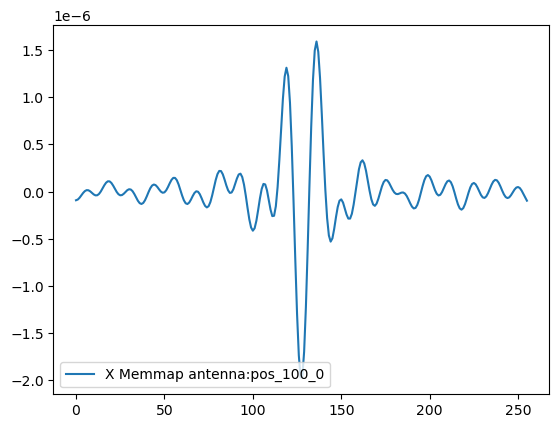

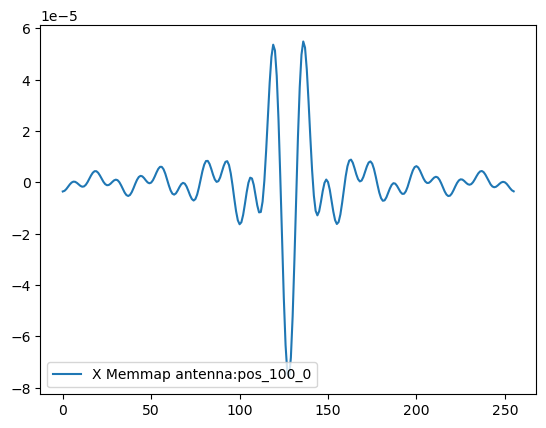

In [ ]:


import numpy as npdata

# Replace 'your_file.dat' with your actual file path
filename = "/Users/denis/Desktop/BachelorThesis/memmaps/177113844/1/output_vBvvB_data.npy"  #This works

filename2 = "/Users/denis/Desktop/BachelorThesis/memmaps/177113844/1/output_meta_data.npy"  #This works
filename3 = "/Users/denis/Desktop/BachelorThesis/memmaps/177113844/1/output_gece_data.npy"  #This works

filename4 = "/Users/denis/Desktop/BachelorThesis/memmaps/177113844/1/meta_data.npy" # this works

filename5 = "/Users/denis/Desktop/BachelorThesis/memmaps/177113844/1/input_data.npy" #this works
filename6 = "/Users/denis/Desktop/BachelorThesis/memmaps/177113844/1/antenna_pos_data.npy" #this works


# Open the memmap file (adjust dtype and shape as needed)
#mmapped_array_XYZ = np.memmap(filename, dtype='float32', mode='r')
#print(mmapped_array_XYZ.shape)

mmapped_array_XYZ = np.memmap(filename, dtype='float32', mode='r',shape=(33, 160, 256, 3), offset=0) #vBvvB
mmapped_array_TIME = np.memmap(filename2, dtype='float32', mode='r',shape=(33, 160, 2), offset=0) #output_meta_data
mmapped_array_XY_gece = np.memmap(filename3, dtype='float32', mode='r',shape=(33, 160, 256, 2), offset=0) #gece

mmapped_array_meta = np.memmap(filename4, dtype='float32', mode='r',shape=(33,13), offset=0) #meta_data
mmapped_array_input = np.memmap(filename5, dtype='float32', mode='r',shape=(33, 1142, 11), offset=0) #input_data
mmapped_array_ant = np.memmap(filename6, dtype='float32', mode='r',shape=(33, 160,3), offset=0) #antenna_data

#print(mmapped_array_XYZ[2][0][:,2])

whatZ = np.array(mmapped_array_XYZ[0][0][:,2]) 
whatY = np.array(mmapped_array_XYZ[0][0][:,1]) 
whatX = np.array(mmapped_array_XYZ[0][0][:,0]) 

what_X_gece = np.array(mmapped_array_XY_gece[0][0][:,0]) 
what_Y_gece = np.array(mmapped_array_XY_gece[0][0][:,1]) 
#print(mmapped_array_XYZ[0][0].shape)
# Print some values to test
#print(mmapped_array) # Print first 10 values
#print(mmapped_array_TIME[0][0])
#print(f"ge ce XYZ: {f_h5['highlevel']['positions'].keys()}")
#print(f"ge ce XYZ: {f_h5['highlevel']['positions']['ge_ce']['pos_100_0']}")
print(f"vB vvB XYZ: {f_h5['highlevel']['positions']['vB_vvB'].keys()}")

i = 'pos_100_0'
#for i in f_h5[f"/highlevel/traces/vB_vvB"]:

time_vB_vvB = np.array(f_h5[f"/highlevel/traces/vB_vvB"][f'{i}'][:,0])
X_vB_vvB = np.array(f_h5[f"/highlevel/traces/vB_vvB"][f'{i}'][:,1])
Y_vB_vvB = np.array(f_h5[f"/highlevel/traces/vB_vvB"][f'{i}'][:,2])
Z_vB_vvB = np.array(f_h5[f"/highlevel/traces/vB_vvB"][f'{i}'][:,3])

print(X.shape)

print(np.array(f_h5[f"/highlevel/traces/vB_vvB"][f'{i}']).shape)

#plt.plot(whatZ[:],label = f'Z Memmap')
#plt.plot(whatZ[:],label = f'Z Memmap antenna:{i}')
#plt.plot(Z,label = f'Z HDF5 antenna:{i}')
#plt.ylim(top = 3 * (10**(-5)), bottom = -3 * (10**(-5)))
##plt.plot(Z-whatZ,label = f'Diff: Memmap vs HDF5 Z antenna:{i}')
#plt.legend()
#plt.show()
#
#plt.plot(whatX[:],label = f'X Memmap antenna:{i}')
#plt.plot(X,label = f'X HDF5 antenna:{i}')
##plt.plot(X-whatX,label = f'Diff: Memmap vs HDF5 X antenna:{i}')
#plt.ylim(top = 8 * (10**(-5)), bottom = -8 * (10**(-5)))
#plt.legend()
#plt.show()
#
#plt.plot(whatY[:],label = f'Y Memmap antenna:{i}')
#plt.plot(Y,label = f'Y HDF5 antenna:{i}')
##plt.plot(Y-whatY,label = f'Diff: Memmap vs HDF5 Y antenna:{i}')
#plt.ylim(top = 3 * (10**(-5)), bottom = -3 * (10**(-5)))
#plt.legend()
#plt.show()

plt.plot(what_X_gece,label = f'X Memmap antenna:{i}')
#plt.plot(X,label = f'X HDF5 antenna:{i}')
#plt.plot(X-whatX,label = f'Diff: Memmap vs HDF5 X antenna:{i}')
#plt.ylim(top = 8 * (10**(-5)), bottom = -8 * (10**(-5)))
plt.legend()
plt.show()

plt.plot(what_Y_gece,label = f'X Memmap antenna:{i}')
#plt.plot(X,label = f'X HDF5 antenna:{i}')
#plt.plot(X-whatX,label = f'Diff: Memmap vs HDF5 X antenna:{i}')
#plt.ylim(top = 8 * (10**(-5)), bottom = -8 * (10**(-5)))
plt.legend()
plt.show()

f_h5.close()
#print(len(whatZ[10:]))
#print(len(X))
#
#max_all = []
#for i in range(0,33):
#    for j in range(0,160):
#        for f in range (0,3):
#                what = np.array(mmapped_array_XYZ[i][j][:,f])
#                max_all.append(max(what))
#print(np.array(mmapped_array_XYZ[1][0][:,0]))

#print(time)
#WIESO SPINNEN DIE WERTE RUM?
#plt.plot(time,what)
#plt.show()

        #plt.plot(time[:],what[:],label = f'Memmap array:{i}, tenna:{j}')
        #plt.plot(time,Y,label = 'HDF5')
        #plt.ylim(top = 6 * (10**(-5)), bottom = -8 * (10**(-5)))
        #plt.legend()
        #plt.show()

#plt.plot(time,X)
#plt.show()

##plt.plot(time,Z)
#plt.show()
#false = []
#for i in max_all:
#        if i > 10**(-3):
#                false.append(i)
#                
#print(false)
#print(max_all)


In [ ]:
print(mmapped_array_ant[0][159][:,])
print()

[-76.97559    3.014334  14.394698]



In [ ]:
import os

len(os.listdir('/Users/denis/Desktop/BachelorThesis/data_everything/177113844/1/iron')) + len(os.listdir('/Users/denis/Desktop/BachelorThesis/data_everything/177113844/1/proton'))

33